# Complete Codes for Dataset "Spotify_Youtube" Project

In [66]:
import pandas as pd
import numpy as np
# Load the data
data = pd.read_csv('Spotify_Youtube.csv')

In [67]:
# Column Information
data.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [68]:
# To know the number of records and attributes of the dataset
rows_count, columns_count = data.shape 
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 20718
Total Number of columns : 28


In [69]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [70]:
# Missing Value
data.isna().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

## Project Report 
## Section 4.2 Data Cleaning

In [71]:
# Handling Missing Values

In [72]:
from sklearn.impute import SimpleImputer
# Numerical columns to be filled with mean values
numerical_columns = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 
                     'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 
                     'Likes', 'Comments', 'Stream']

# Categorical columns to be filled with the most frequent value
categorical_columns = ['Url_youtube', 'Title', 'Channel', 'Description', 'Licensed', 'official_video']

# Fill missing values for numerical columns with the mean
imputer_mean = SimpleImputer(strategy='mean')
data[numerical_columns] = imputer_mean.fit_transform(data[numerical_columns])

# Fill missing values for categorical columns with the most frequent value
imputer_mode = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = imputer_mode.fit_transform(data[categorical_columns])

# Verify no missing values remain
missing_values_after = data.isnull().sum()
print(missing_values_after)

Unnamed: 0          0
Artist              0
Url_spotify         0
Track               0
Album               0
Album_type          0
Uri                 0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Url_youtube         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Description         0
Licensed            0
official_video      0
Stream              0
dtype: int64


In [73]:
# Find Duplicate Value
duplicates = data[data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Unnamed: 0, Artist, Url_spotify, Track, Album, Album_type, Uri, Danceability, Energy, Key, Loudness, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Duration_ms, Url_youtube, Title, Channel, Views, Likes, Comments, Description, Licensed, official_video, Stream]
Index: []

[0 rows x 28 columns]


## Project Report 
## Section 4.4 Descriptive Analysis

In [74]:
# Summary Statistics of Numerical Columns
numerical_columns = data.select_dtypes(include=['float64'])
numerical_columns.describe().T


,count,mean,std,min,25%,50%,75%,max
Danceability,20718.0,6.197775e-01,1.652644e-01,0.000000,5.182500e-01,6.370000e-01,7.400000e-01,9.750000e-01
Energy,20718.0,6.352503e-01,2.141365e-01,0.000020,5.070000e-01,6.660000e-01,7.980000e-01,1.000000e+00
Key,20718.0,5.300348e+00,3.576276e+00,0.000000,2.000000e+00,5.000000e+00,8.000000e+00,1.100000e+01
Loudness,20718.0,-7.671680e+00,4.632525e+00,-46.251000,-8.858000e+00,-6.536500e+00,-4.931250e+00,9.200000e-01
Speechiness,20718.0,9.645601e-02,1.119546e-01,0.000000,3.570000e-02,5.050000e-02,1.030000e-01,9.640000e-01
Acousticness,20718.0,2.915353e-01,2.862850e-01,0.000001,4.520000e-02,1.930000e-01,4.770000e-01,9.960000e-01
Instrumentalness,20718.0,5.596156e-02,1.932527e-01,0.000000,0.000000e+00,2.410000e-06,4.630000e-04,1.000000e+00
Liveness,20718.0,1.935210e-01,1.685228e-01,0.014500,9.412500e-02,1.250000e-01,2.370000e-01,1.000000e+00
Valence,20718.0,5.298533e-01,2.454290e-01,0.000000,3.390000e-01,5.370000e-01,7.260000e-01,9.930000e-01
Tempo,20718.0,1.206383e+02,2.957759e+01,0.000000,9.700200e+01,1.199655e+02,1.399350e+02,2.433720e+02


## Project Report 
## Section 4.5 Exploratory Data Analyses (EDAs)

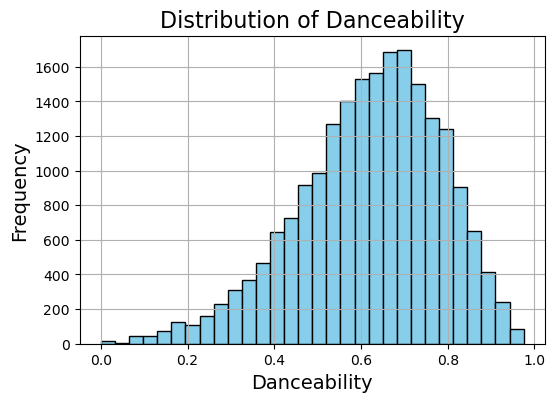


### Observations for Danceability:


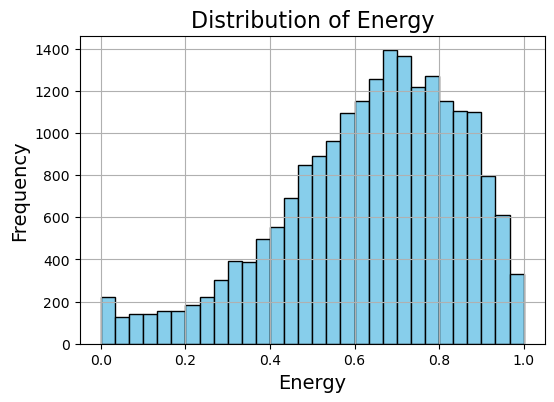


### Observations for Energy:


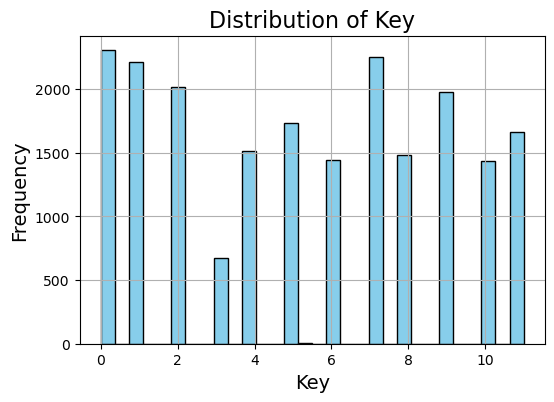


### Observations for Key:


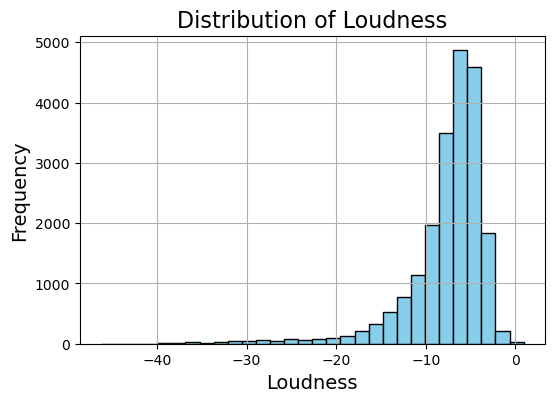


### Observations for Loudness:


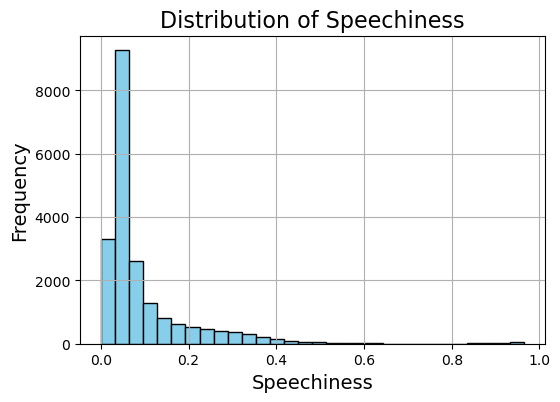


### Observations for Speechiness:
- The distribution appears to be right-skewed, with most songs having low speechiness values.
- A small portion of songs exhibit higher speechiness, indicating the presence of spoken words.


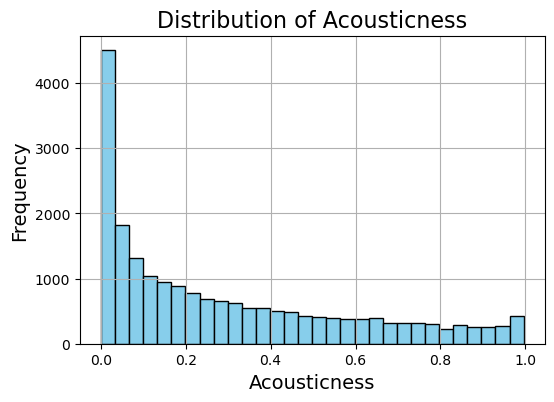


### Observations for Acousticness:
- The distribution seems relatively evenly spread, with a peak around lower values.
- There's a noticeable proportion of songs with higher acousticness, suggesting a significant acoustic component.


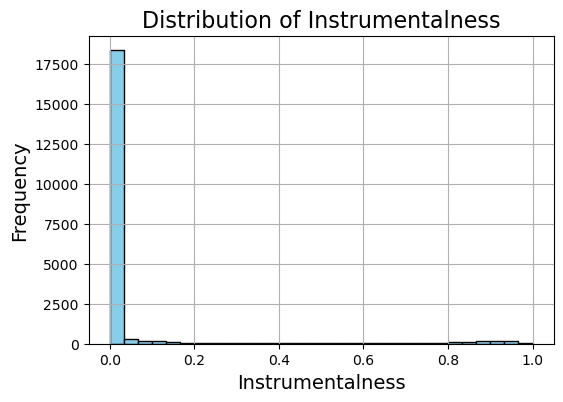


### Observations for Instrumentalness:
- The distribution is heavily skewed towards lower values, implying most songs contain vocals.
- Some songs are entirely instrumental, indicated by a long tail on the right side.


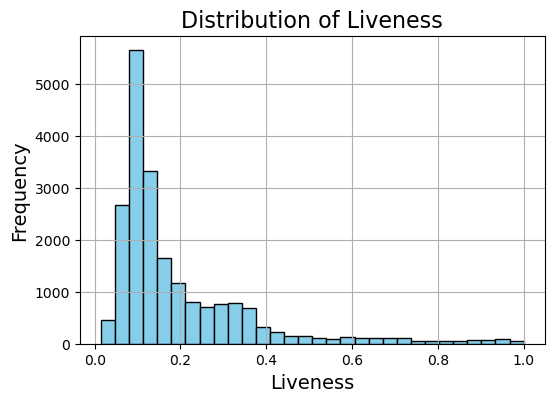


### Observations for Liveness:
- The distribution appears somewhat right-skewed, with the majority of songs having lower liveness values.
- Fewer songs exhibit higher liveness, indicating a smaller proportion of live recordings.


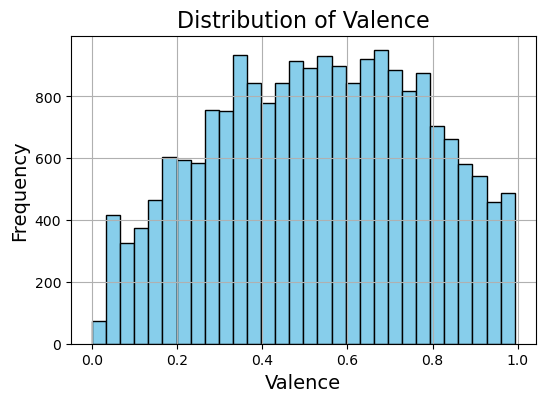


### Observations for Valence:
- The distribution seems relatively symmetric, centered around moderate values.
- There's variability in valence, with songs conveying both positive and negative emotional tones.


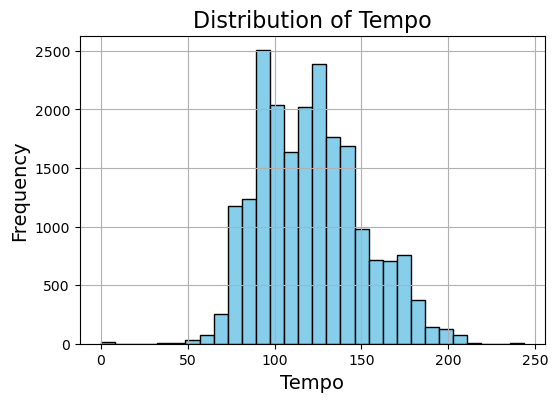


### Observations for Tempo:
- The distribution appears approximately normal, centered around a moderate tempo.
- Some outliers have very low or very high tempo values, but most songs fall within a moderate tempo range.


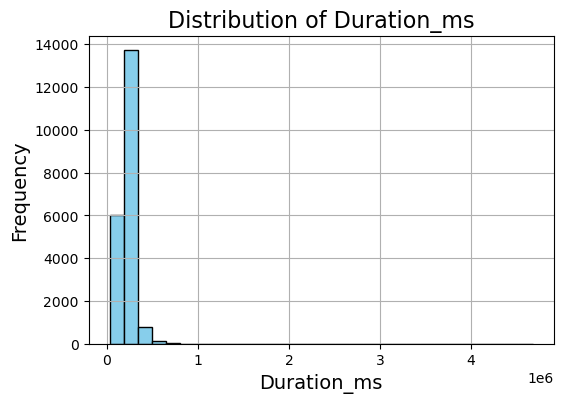


### Observations for Duration_ms:
- The distribution is right-skewed, with a peak around shorter durations.
- Some songs have much longer durations, indicating variability in track length.


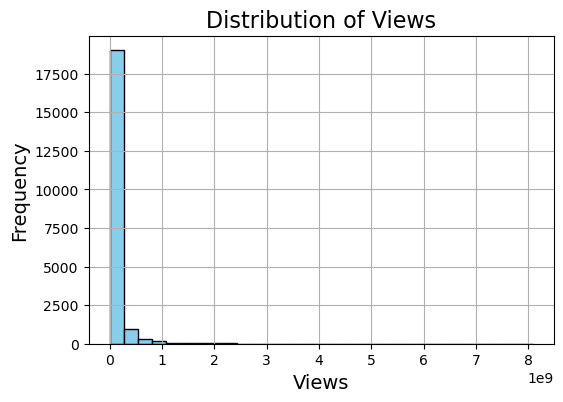


### Observations for Views:


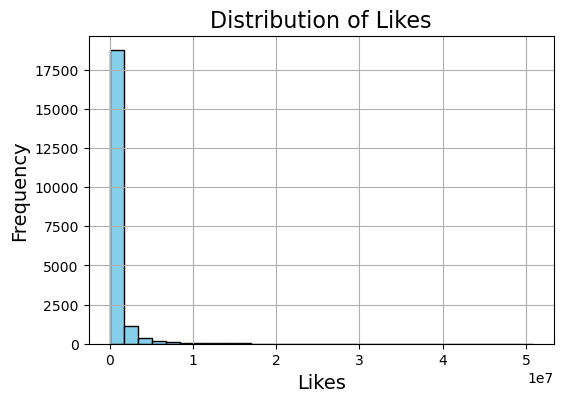


### Observations for Likes:


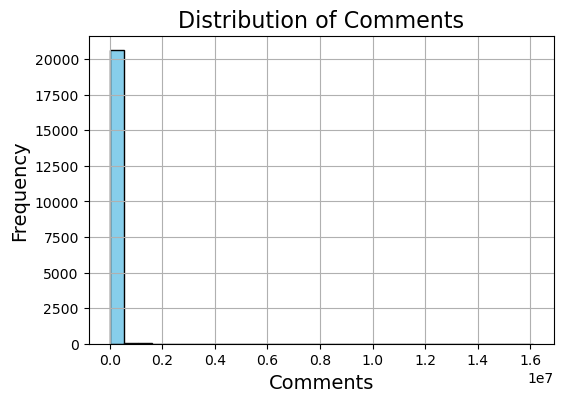


### Observations for Comments:


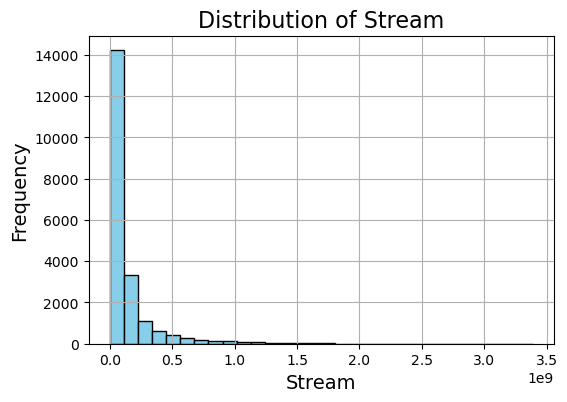


### Observations for Stream:


In [75]:
# Frquency Distribution of features
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = data.select_dtypes(include=['float64']).columns

# Plot histograms for each numerical feature
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(data[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True)
    plt.show()
    
    # Print observations
    print(f"\n### Observations for {column}:")
    if column == 'Speechiness':
        print("- The distribution appears to be right-skewed, with most songs having low speechiness values.")
        print("- A small portion of songs exhibit higher speechiness, indicating the presence of spoken words.")
    elif column == 'Acousticness':
        print("- The distribution seems relatively evenly spread, with a peak around lower values.")
        print("- There's a noticeable proportion of songs with higher acousticness, suggesting a significant acoustic component.")
    elif column == 'Instrumentalness':
        print("- The distribution is heavily skewed towards lower values, implying most songs contain vocals.")
        print("- Some songs are entirely instrumental, indicated by a long tail on the right side.")
    elif column == 'Liveness':
        print("- The distribution appears somewhat right-skewed, with the majority of songs having lower liveness values.")
        print("- Fewer songs exhibit higher liveness, indicating a smaller proportion of live recordings.")
    elif column == 'Valence':
        print("- The distribution seems relatively symmetric, centered around moderate values.")
        print("- There's variability in valence, with songs conveying both positive and negative emotional tones.")
    elif column == 'Tempo':
        print("- The distribution appears approximately normal, centered around a moderate tempo.")
        print("- Some outliers have very low or very high tempo values, but most songs fall within a moderate tempo range.")
    elif column == 'Duration_ms':
        print("- The distribution is right-skewed, with a peak around shorter durations.")
        print("- Some songs have much longer durations, indicating variability in track length.")

## Project Report
## Section 4.6 Distribution of Songs by Album Type:

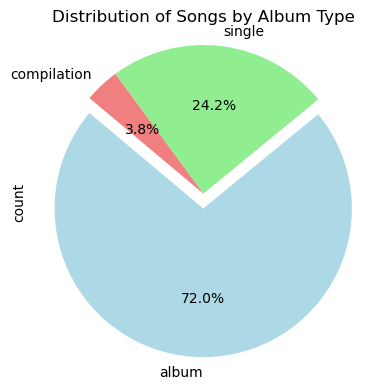

In [76]:
# Distribution of Songs by Album type
album_type_counts = data['Album_type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4, 4))
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']

# Calculate explode values dynamically based on the number of categories
explode = [0.1] + [0] * (len(album_type_counts) - 1)

album_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Distribution of Songs by Album Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

## Project Report:
## Section 4.7 Description of Engagement Metrics

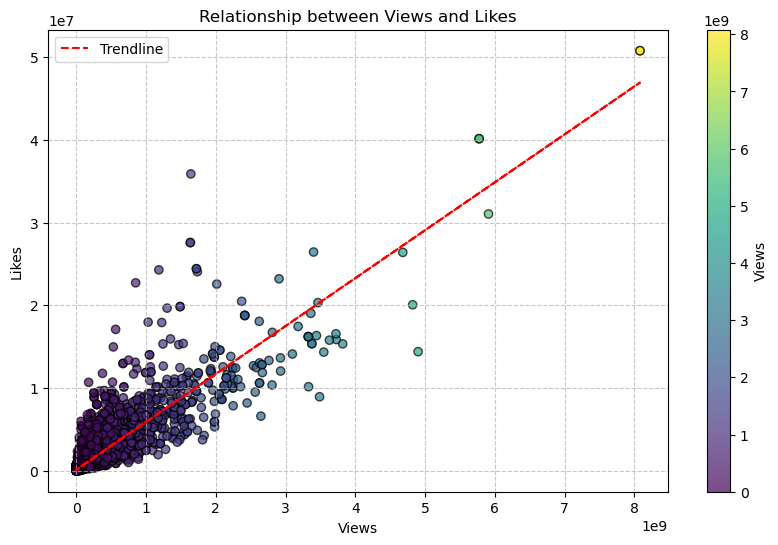

In [77]:
# Scatter plot of Views vs. Likes
plt.figure(figsize=(10, 6))
plt.scatter(data['Views'], data['Likes'], c=data['Views'], cmap='viridis', alpha=0.7, edgecolors='black')
plt.title('Relationship between Views and Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a trendline
import numpy as np
z = np.polyfit(data['Views'], data['Likes'], 1)
p = np.poly1d(z)
plt.plot(data['Views'],p(data['Views']),"r--", label='Trendline')

# Colorbar for Views
cbar = plt.colorbar()
cbar.set_label('Views')

plt.legend()
plt.show()

## Project Report:
## Section 4.7 Description of Engagement Metrics

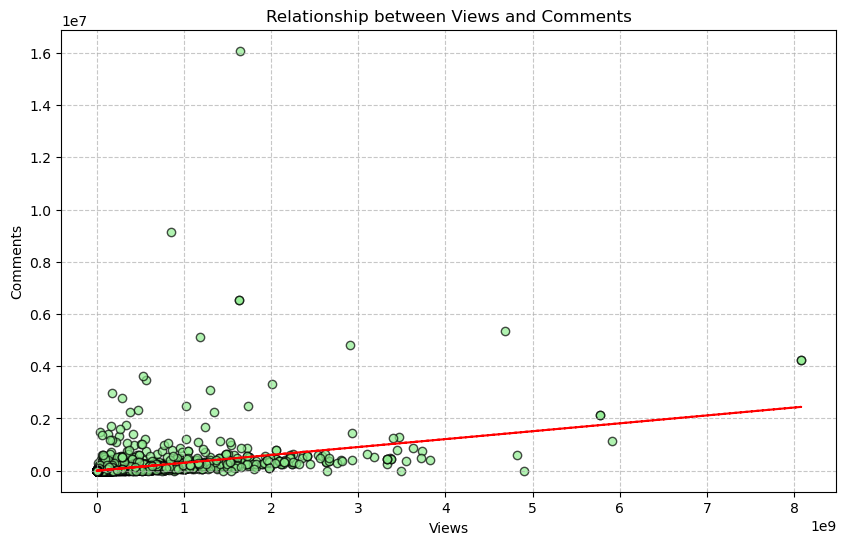

In [78]:
# Scatter plot of Views vs. Comments
plt.figure(figsize=(10, 6))
plt.scatter(data['Views'], data['Comments'], color='lightgreen', alpha=0.7, edgecolors='black')
plt.title('Relationship between Views and Comments')
plt.xlabel('Views')
plt.ylabel('Comments')
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a trendline
import numpy as np
z = np.polyfit(data['Views'], data['Comments'], 1)
p = np.poly1d(z)
plt.plot(data['Views'],p(data['Views']),"r--")

plt.show()

## Project Report:
## Section 4.8 Top 10 Artist on Spotify and YouTube

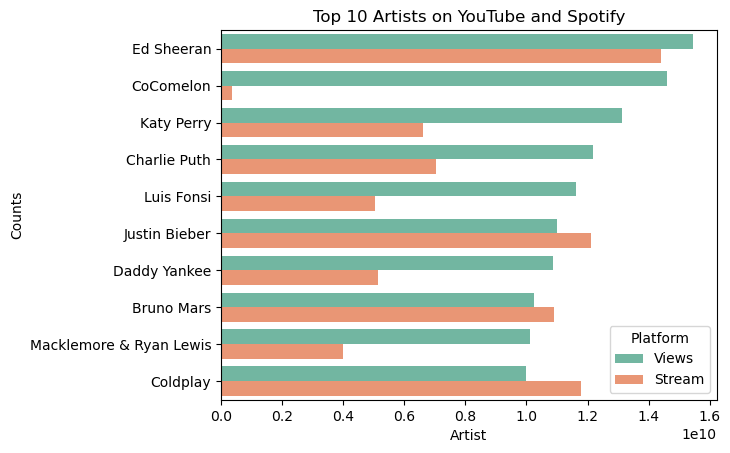

In [79]:
import seaborn as sns
# Top 10 Artist on both platform
data_grouped = data.groupby('Artist')[['Views', 'Stream']].sum().reset_index()
data_grouped = data_grouped.sort_values(by='Views', ascending=False)[:10]
data_melted = pd.melt(data_grouped, id_vars=['Artist'], var_name='Platform', value_name='Counts')

sns.barplot(y='Artist', x='Counts', hue='Platform', data=data_melted, orient = 'h')
plt.xticks(rotation=0)
plt.xlabel('Artist')
plt.ylabel('Counts')
plt.title('Top 10 Artists on YouTube and Spotify');



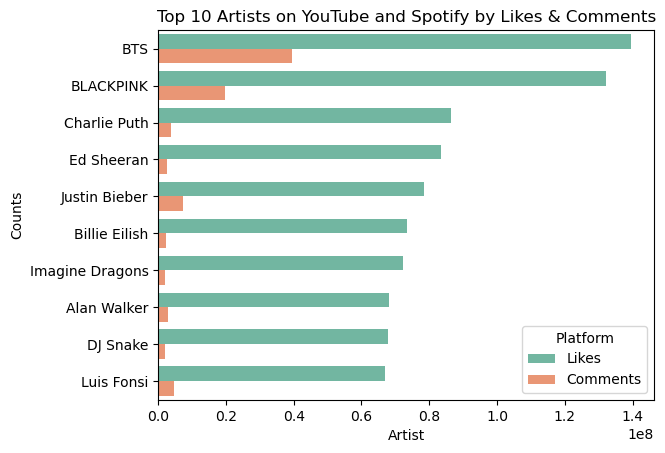

In [80]:
# Top 10 Artise on both platform by Likes and Comments
data_grouped = data.groupby('Artist')[['Likes', 'Comments']].sum().reset_index()
data_grouped = data_grouped.sort_values(by='Likes', ascending=False)[:10]
data_melted = pd.melt(data_grouped, id_vars=['Artist'], var_name='Platform', value_name='Counts')

sns.barplot(y='Artist', x='Counts', hue='Platform', data=data_melted, orient = 'h')
plt.xticks(rotation=0)
plt.xlabel('Artist')
plt.ylabel('Counts')
plt.title('Top 10 Artists on YouTube and Spotify by Likes & Comments');



## Project Report
## Section 4.9 Top 10 YouTube Channels with most Views

C:\Users\Sanji\AppData\Local\Temp\ipykernel_58132\1476621105.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_channel.values, y=data_channel.index, palette='autumn')


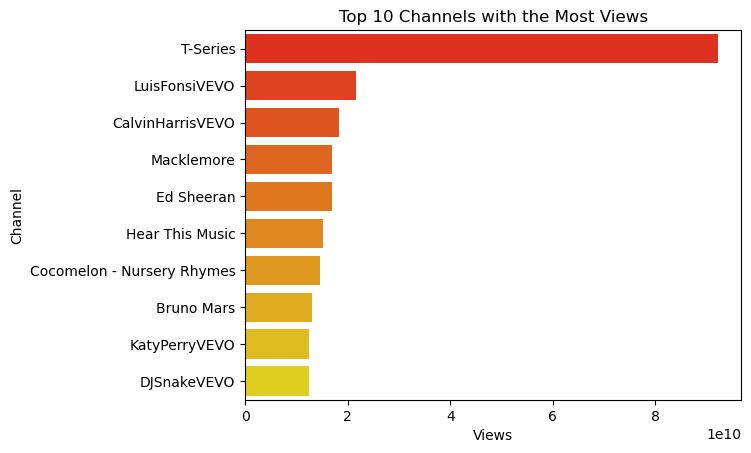

In [81]:
# Top 10 Channels with most view:
data_channel= data.groupby('Channel')['Views'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=data_channel.values, y=data_channel.index, palette='autumn')
plt.title('Top 10 Channels with the Most Views', fontsize=12)
plt.xlabel('Views', fontsize=10)
plt.ylabel('Channel', fontsize=10)
plt.show()

In [ ]:
## Features that associated with top 10 tracks according to Spotify

C:\Users\Sanji\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


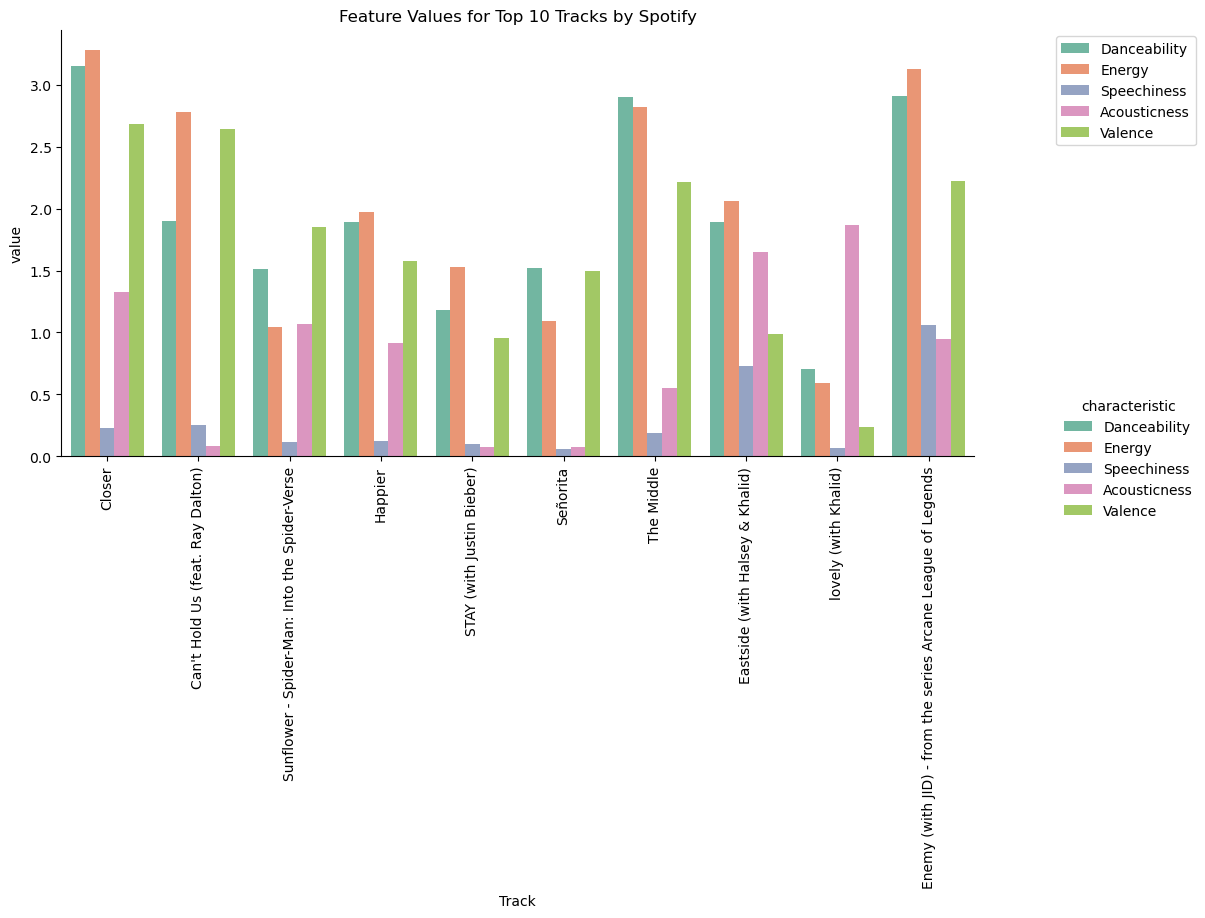

In [82]:
# Convert 'Track' to string type
data['Track'] = data['Track'].astype(str)

# Group by 'Track' and sum numerical columns, then sort by 'Stream' and get the top 10 tracks
top_10_spotify = data.groupby('Track').sum(numeric_only=True).sort_values('Stream', ascending=False).reset_index().head(10)

# Melt the DataFrame for plotting
melt_spotify = top_10_spotify.melt(id_vars='Track', value_vars=['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Valence'], var_name='characteristic', value_name='value')

# Plotting
fig = sns.catplot(x='Track', y='value', hue='characteristic', data=melt_spotify, kind='bar', aspect=2)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title('Feature Values for Top 10 Tracks by Spotify')
plt.xticks(rotation=90)
fig.tight_layout()
plt.show()

In [83]:
## Features that associated with top 10 tracks according to YouTube Views

C:\Users\Sanji\AppData\Local\Temp\ipykernel_58132\1960063861.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_features['Track'] = top_10_tracks['Track']
C:\Users\Sanji\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Sanji\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Sanji\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Sanji\anac

<Figure size 1000x600 with 0 Axes>

C:\Users\Sanji\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sanji\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sanji\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sanji\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sanji\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


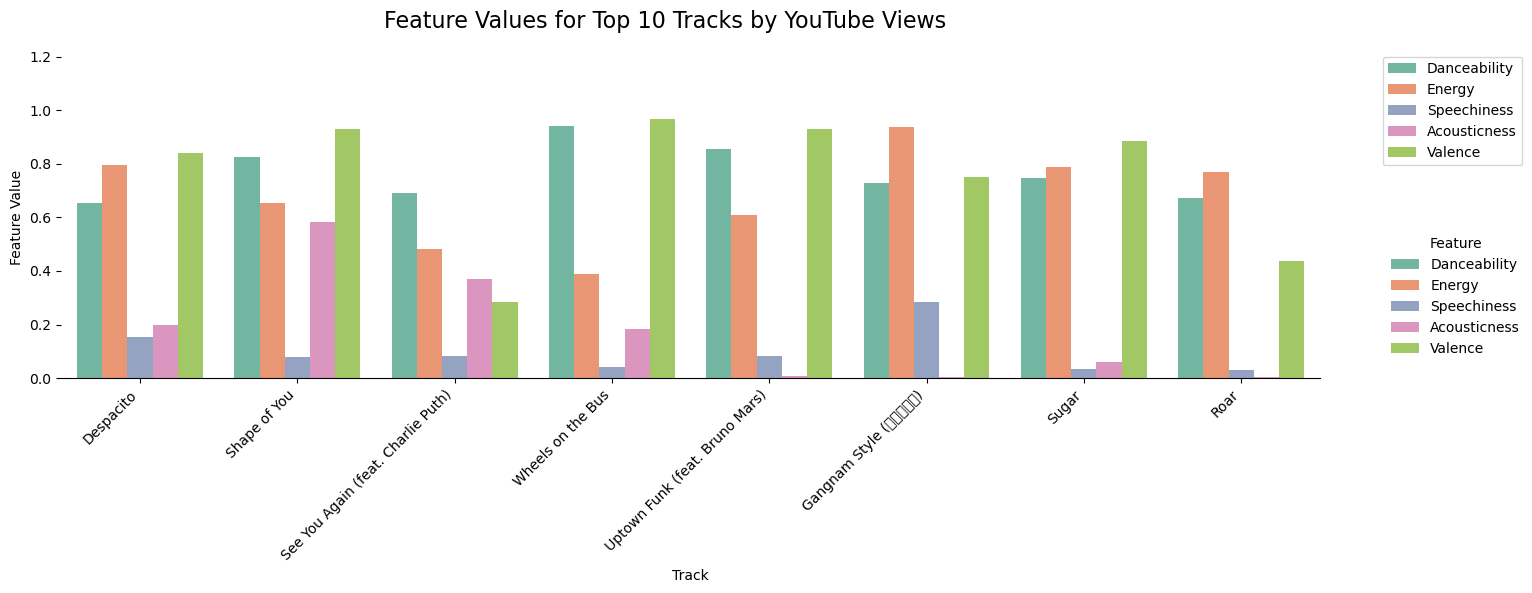

In [84]:
# Sort by YouTube views to get the top 10 tracks
top_10_tracks = data.sort_values(by='Views', ascending=False).head(10)

# Extract relevant features
features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Valence']
top_10_features = top_10_tracks[features]

# Add a column for the track names or some identifier for better visualization
top_10_features['Track'] = top_10_tracks['Track']

# Melt the DataFrame for easier plotting with seaborn
melted_data = pd.melt(top_10_features, id_vars=['Track'], value_vars=features, 
                      var_name='Feature', value_name='Value')

# Set the figure size and palette
plt.figure(figsize=(10, 6))
sns.set_palette('Set2')

# Create a catplot
catplot = sns.catplot(data=melted_data, x='Track', y='Value', hue='Feature', kind='bar', height=6, aspect=2)

# Adjust the plot
catplot.set_xticklabels(rotation=45, ha='right')
catplot.set_titles('Feature Values for Top 10 Tracks by YouTube Views')
catplot.set_axis_labels('Track', 'Feature Value')
catplot.fig.suptitle('Feature Values for Top 10 Tracks by YouTube Views', fontsize=16)
catplot.set_yticklabels(fontsize=10)
catplot.set_xticklabels(fontsize=10)
catplot.despine(left=True)
plt.tight_layout()

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()

In [85]:
## Features that associated with top 10 tracks according to YouTube Comments

C:\Users\Sanji\AppData\Local\Temp\ipykernel_58132\1205484664.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_features_comments['Track'] = top_10_tracks_comments['Track']
C:\Users\Sanji\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Sanji\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Sanji\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C

<Figure size 1000x600 with 0 Axes>

C:\Users\Sanji\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sanji\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sanji\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sanji\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sanji\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


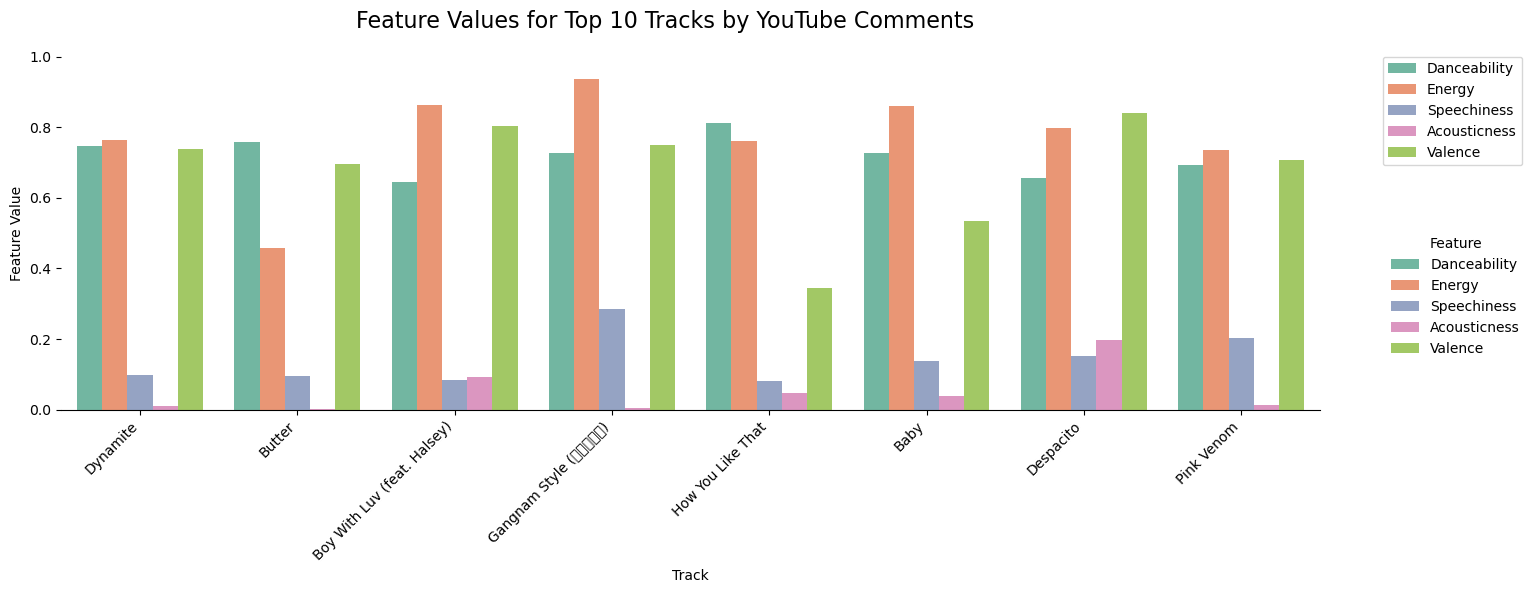

In [86]:
# Sort by YouTube comments to get the top 10 tracks
top_10_tracks_comments = data.sort_values(by='Comments', ascending=False).head(10)

# Extract relevant features
features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Valence']
top_10_features_comments = top_10_tracks_comments[features]

# Add a column for the track names or some identifier for better visualization
top_10_features_comments['Track'] = top_10_tracks_comments['Track']

# Melt the DataFrame for easier plotting with seaborn
melted_data_comments = pd.melt(top_10_features_comments, id_vars=['Track'], value_vars=features, 
                               var_name='Feature', value_name='Value')

# Set the figure size and palette
plt.figure(figsize=(10, 6))
sns.set_palette('Set2')

# Create a catplot
catplot_comments = sns.catplot(data=melted_data_comments, x='Track', y='Value', hue='Feature', kind='bar', height=6, aspect=2)

# Adjust the plot
catplot_comments.set_xticklabels(rotation=45, ha='right')
catplot_comments.set_titles('Feature Values for Top 10 Tracks by YouTube Comments')
catplot_comments.set_axis_labels('Track', 'Feature Value')
catplot_comments.fig.suptitle('Feature Values for Top 10 Tracks by YouTube Comments', fontsize=16)
catplot_comments.set_yticklabels(fontsize=10)
catplot_comments.set_xticklabels(fontsize=10)
catplot_comments.despine(left=True)
plt.tight_layout()

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()

In [87]:
# Features that associated with top 10 tracks according to YouTube Likes

C:\Users\Sanji\AppData\Local\Temp\ipykernel_58132\4023460824.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_features_likes['Track'] = top_10_tracks_likes['Track']
C:\Users\Sanji\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Sanji\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Sanji\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\User

<Figure size 1000x600 with 0 Axes>

C:\Users\Sanji\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sanji\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sanji\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sanji\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sanji\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


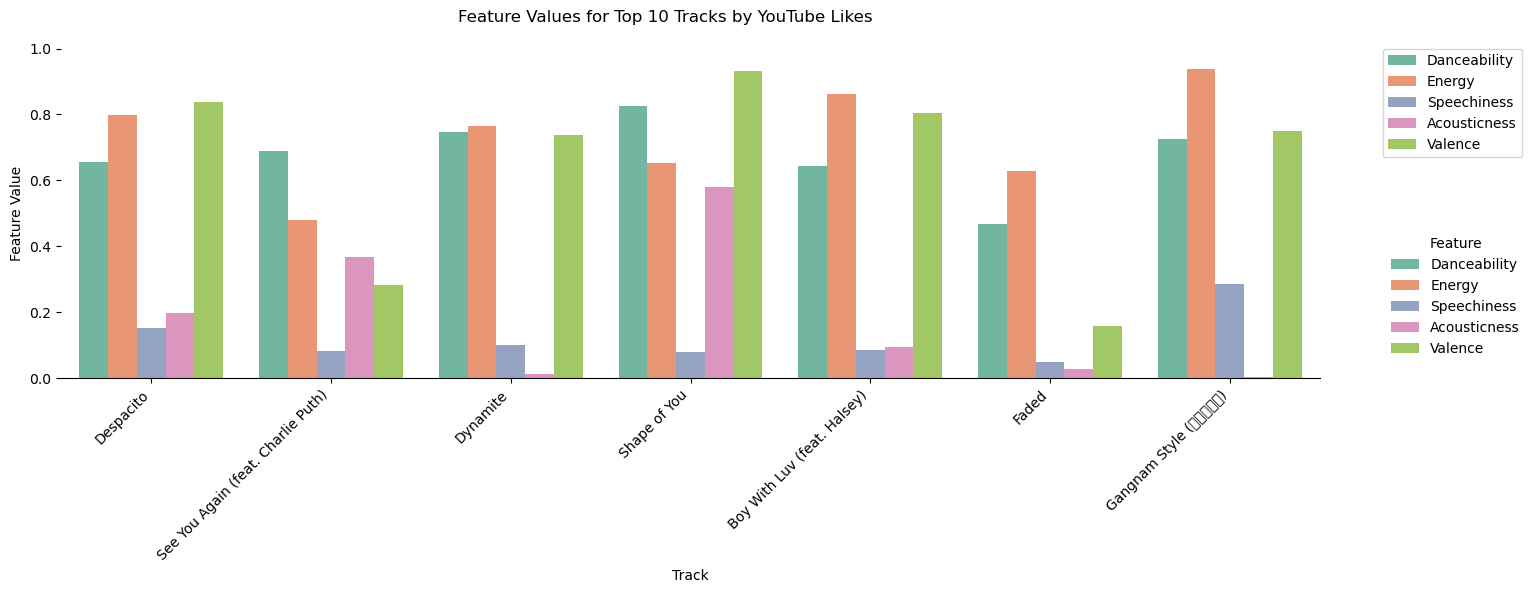

In [88]:
# Sort by YouTube Likes to get the top 10 tracks
top_10_tracks_likes = data.sort_values(by='Likes', ascending=False).head(10)

# Extract relevant features
features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Valence']
top_10_features_likes = top_10_tracks_likes[features]

# Add a column for the track names or some identifier for better visualization
top_10_features_likes['Track'] = top_10_tracks_likes['Track']

# Melt the DataFrame for easier plotting with seaborn
melted_data_likes = pd.melt(top_10_features_likes, id_vars=['Track'], value_vars=features, 
                               var_name='Feature', value_name='Value')

# Set the figure size and palette
plt.figure(figsize=(10, 6))
sns.set_palette('Set2')

# Create a catplot
catplot_likes = sns.catplot(data=melted_data_likes, x='Track', y='Value', hue='Feature', kind='bar', height=6, aspect=2)

# Adjust the plot
catplot_likes.set_xticklabels(rotation=45, ha='right')
catplot_likes.set_titles('Feature Values for Top 10 Tracks by YouTube Likes')
catplot_likes.set_axis_labels('Track', 'Feature Value')
catplot_likes.fig.suptitle('Feature Values for Top 10 Tracks by YouTube Likes', fontsize=12)
catplot_likes.set_yticklabels(fontsize=10)
catplot_likes.set_xticklabels(fontsize=10)
catplot_likes.despine(left=True)
plt.tight_layout()

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()

## Project Report
## Section 4.10 Spotify and YouTube Views by Duration:

C:\Users\Sanji\AppData\Local\Temp\ipykernel_58132\3818687300.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration= data.groupby('Duration_ms_levels').Views.sum()


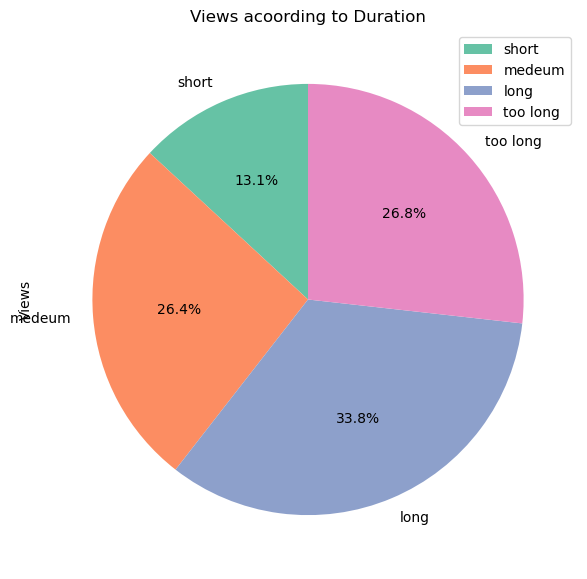

In [89]:
beins =[30985,180240,213253,251920,4676058]
labels = [ 'short','medeum','long','too long']
data['Duration_ms_levels']=pd.cut(data['Duration_ms'],beins,labels=labels)

plt.figure(figsize=(12,7))
duration= data.groupby('Duration_ms_levels').Views.sum()
duration.plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('Views acoording to Duration')
plt.legend(loc='best')
plt.show() 


In [30]:
# Spotify Streaming by Duration

C:\Users\Sanji\AppData\Local\Temp\ipykernel_58132\788716336.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration= data.groupby('Duration_ms_levels').Stream.sum()


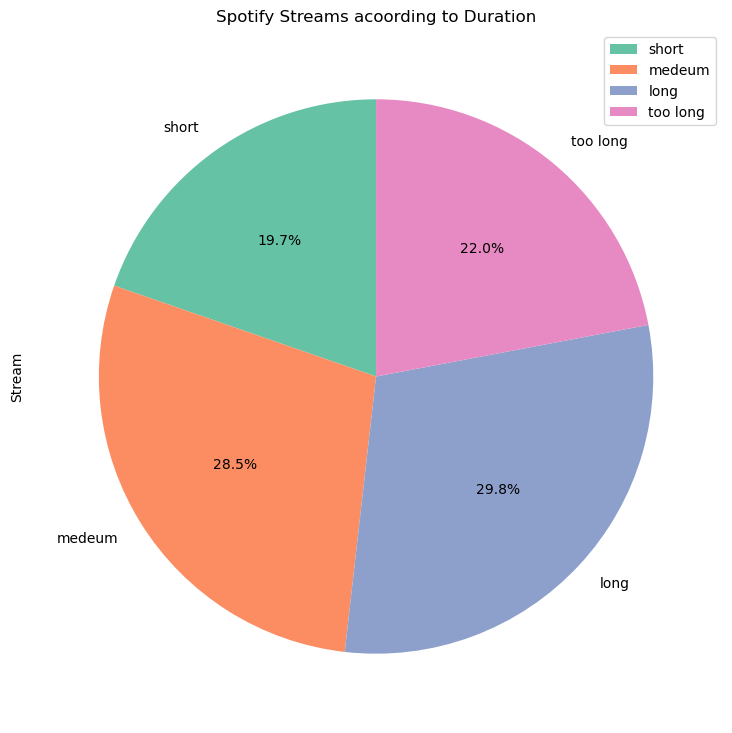

In [90]:
plt.figure(figsize=(14,9))
duration= data.groupby('Duration_ms_levels').Stream.sum()
duration.plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('Spotify Streams acoording to Duration')
plt.legend(loc='best')
plt.show() 

# PROJECT QUESTIONS ANSWER

## 1. What are the critical factors that influence the popularity of a music track on platforms like Spotify and YouTube, and how can this understanding guide strategic decisions?

In [ ]:
## Feature importances for spotify only

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Fill missing values for audio features and engagement metrics with the mean value of each column
features_to_fill = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 
                    'Tempo', 'Duration_ms', 'Stream']
data[features_to_fill] = data[features_to_fill].fillna(data[features_to_fill].mean())

# Fill missing values for categorical variables with a placeholder
data[['Album_type']] = data[['Album_type']].fillna('Unknown')

# One-hot encode categorical variables
encoded_data = pd.get_dummies(data[['Album_type']], drop_first=True)

# One-hot encode categorical variables
encoded_data_s2 = pd.get_dummies(data[['Album_type']], drop_first=True)

# Combine encoded categorical variables with numerical data
combined_data_s2 = pd.concat([data[features_to_fill], encoded_data], axis=1)

# Separate features and target variable
y = combined_data_s2['Stream']
X = combined_data_s2.drop('Stream', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}/n')



# Extract feature importances
importances = model.feature_importances_
feature_names = X.columns

# Combine feature names and importances into a DataFrame
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("Key Factors Influencing the Popularity of a Track on Spotify:")
print(feature_importances)


Mean Squared Error: 4.239187273077002e+16/n
Key Factors Influencing the Popularity of a Track on Spotify:
                   Feature  Importance
3                 Loudness    0.126730
1                   Energy    0.103331
10             Duration_ms    0.102884
5             Acousticness    0.099493
8                  Valence    0.098005
4              Speechiness    0.096722
9                    Tempo    0.096544
7                 Liveness    0.088033
0             Danceability    0.087536
2                      Key    0.045310
6         Instrumentalness    0.045202
12       Album_type_single    0.009149
11  Album_type_compilation    0.001063


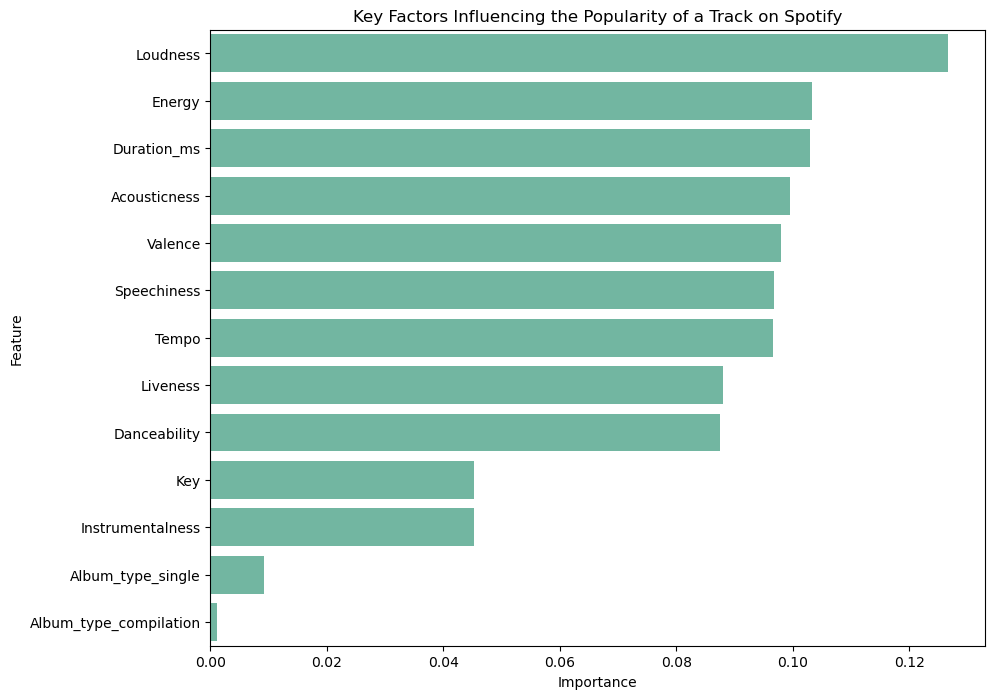

In [92]:
# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Key Factors Influencing the Popularity of a Track on Spotify')
plt.show()

In [ ]:
## Feature importance for YouTube

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Fill missing values for audio features and engagement metrics with the mean value of each column
features_to_fill = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 
                    'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream']
data[features_to_fill] = data[features_to_fill].fillna(data[features_to_fill].mean())

# Fill missing values for categorical variables with a placeholder
data[['Album_type']] = data[['Album_type']].fillna('Unknown')

# One-hot encode categorical variables
encoded_data = pd.get_dummies(data[['Album_type']], drop_first=True)

# Combine encoded categorical variables with numerical data
combined_data = pd.concat([data[features_to_fill], encoded_data], axis=1)

# Separate features and target variables
X = combined_data.drop(['Stream', 'Views', 'Likes', 'Comments'], axis=1)
y_streams = combined_data['Stream']
y_views = data['Views']
y_likes = data['Likes']
y_comments = data['Comments']

# Split the data into training and testing sets
X_train_streams, X_test_streams, y_train_streams, y_test_streams = train_test_split(X, y_streams, test_size=0.2, random_state=42)
X_train_views, X_test_views, y_train_views, y_test_views = train_test_split(X, y_views, test_size=0.2, random_state=42)
X_train_likes, X_test_likes, y_train_likes, y_test_likes = train_test_split(X, y_likes, test_size=0.2, random_state=42)
X_train_comments, X_test_comments, y_train_comments, y_test_comments = train_test_split(X, y_comments, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_streams = scaler.fit_transform(X_train_streams)
X_test_streams = scaler.transform(X_test_streams)
X_train_views = scaler.fit_transform(X_train_views)
X_test_views = scaler.transform(X_test_views)
X_train_likes = scaler.fit_transform(X_train_likes)
X_test_likes = scaler.transform(X_test_likes)
X_train_comments = scaler.fit_transform(X_train_comments)
X_test_comments = scaler.transform(X_test_comments)


In [94]:
# Initialize and train the models
model_streams = RandomForestRegressor(n_estimators=100, random_state=42)
model_streams.fit(X_train_streams, y_train_streams)
y_pred_streams = model_streams.predict(X_test_streams)
mse_streams = mean_squared_error(y_test_streams, y_pred_streams)
print(f'Mean Squared Error (Streams): {mse_streams}\n')

model_views = RandomForestRegressor(n_estimators=100, random_state=42)
model_views.fit(X_train_views, y_train_views)
y_pred_views = model_views.predict(X_test_views)
mse_views = mean_squared_error(y_test_views, y_pred_views)
print(f'Mean Squared Error (Views): {mse_views}\n')

model_likes = RandomForestRegressor(n_estimators=100, random_state=42)
model_likes.fit(X_train_likes, y_train_likes)
y_pred_likes = model_likes.predict(X_test_likes)
mse_likes = mean_squared_error(y_test_likes, y_pred_likes)
print(f'Mean Squared Error (Likes): {mse_likes}\n')


model_comments = RandomForestRegressor(n_estimators=100, random_state=42)
model_comments.fit(X_train_comments, y_train_comments)
y_pred_comments = model_comments.predict(X_test_comments)
mse_comments = mean_squared_error(y_test_comments, y_pred_comments)
print(f'Mean Squared Error (Comments): {mse_comments}')


Mean Squared Error (Streams): 4.239187273077002e+16

Mean Squared Error (Views): 5.345250573135106e+16

Mean Squared Error (Likes): 1940013454274.3584

Mean Squared Error (Comments): 15729246371.392044


In [41]:
# Extract feature importances
importances_streams = model_streams.feature_importances_
importances_views = model_views.feature_importances_
importances_likes = model_likes.feature_importances_
importances_comments = model_comments.feature_importances_

feature_names = X.columns

# Combine feature names and importances into DataFrames
feature_importances_streams = pd.DataFrame({'Feature': feature_names, 'Importance': importances_streams}).sort_values(by='Importance', ascending=False)
feature_importances_views = pd.DataFrame({'Feature': feature_names, 'Importance': importances_views}).sort_values(by='Importance', ascending=False)
feature_importances_likes = pd.DataFrame({'Feature': feature_names, 'Importance': importances_likes}).sort_values(by='Importance', ascending=False)
feature_importances_comments = pd.DataFrame({'Feature': feature_names, 'Importance': importances_comments}).sort_values(by='Importance', ascending=False)

In [ ]:
## Feature Importances for Predicting Streams

Feature Importances for Predicting Streams:
                   Feature  Importance
3                 Loudness    0.126730
1                   Energy    0.103331
10             Duration_ms    0.102884
5             Acousticness    0.099493
8                  Valence    0.098005
4              Speechiness    0.096722
9                    Tempo    0.096544
7                 Liveness    0.088033
0             Danceability    0.087536
2                      Key    0.045310
6         Instrumentalness    0.045202
12       Album_type_single    0.009149
11  Album_type_compilation    0.001063


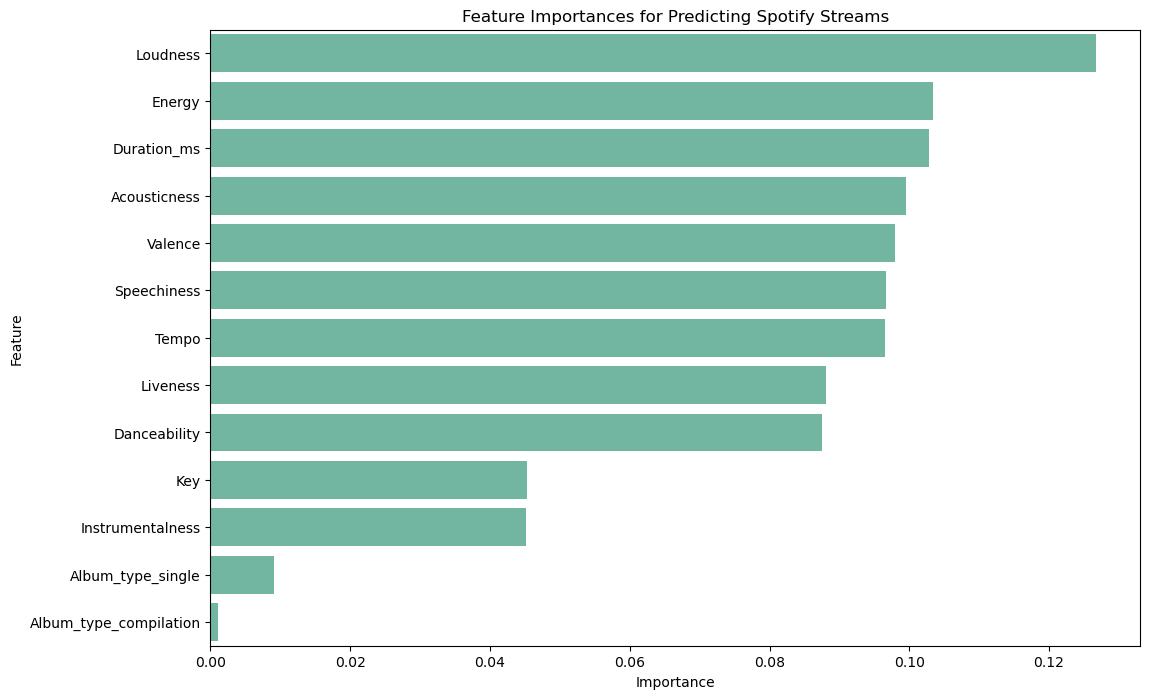

In [42]:
# Print feature importances
print("Feature Importances for Predicting Streams:")
print(feature_importances_streams)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_streams)
plt.title('Feature Importances for Predicting Spotify Streams')
plt.show()

In [ ]:
## Feature Importances for Predicting Views


Feature Importances for Predicting Views:
                   Feature  Importance
9                    Tempo    0.151918
3                 Loudness    0.128172
10             Duration_ms    0.104509
0             Danceability    0.093591
7                 Liveness    0.093157
5             Acousticness    0.086168
4              Speechiness    0.083567
1                   Energy    0.081109
8                  Valence    0.080207
2                      Key    0.044158
6         Instrumentalness    0.043359
12       Album_type_single    0.007165
11  Album_type_compilation    0.002920


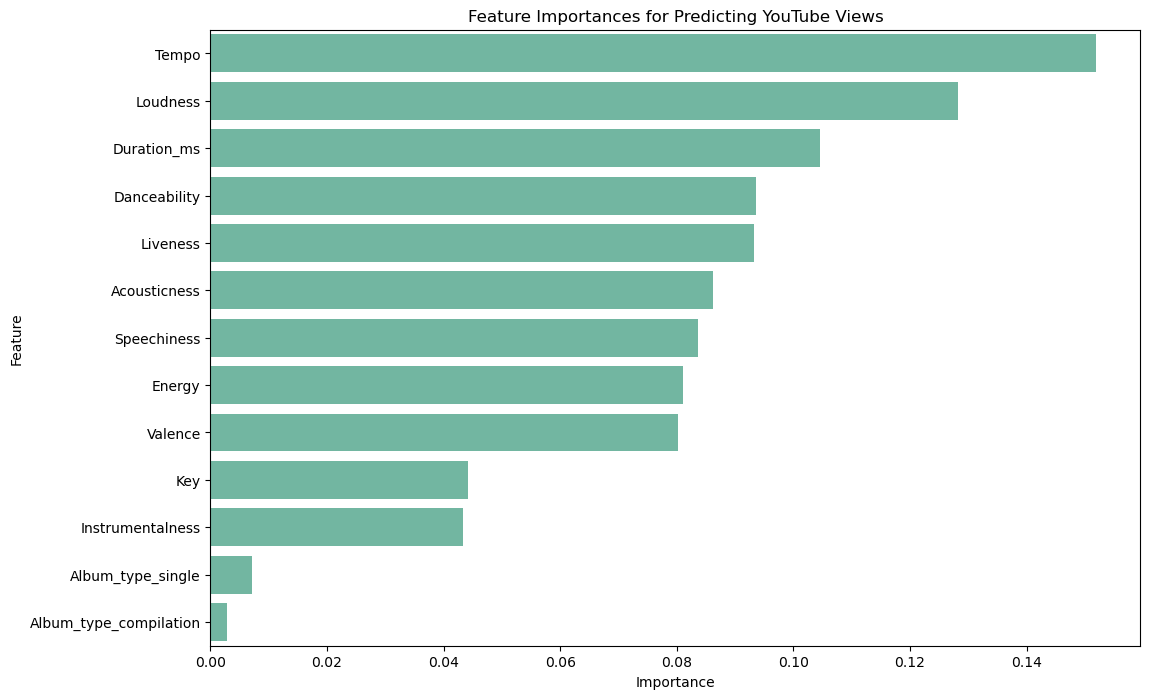

In [43]:
print("\nFeature Importances for Predicting Views:")
print(feature_importances_views)


plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_views)
plt.title('Feature Importances for Predicting YouTube Views')
plt.show()

In [ ]:
## Feature Importances for Predicting Likes


Feature Importances for Predicting Likes:
                   Feature  Importance
3                 Loudness    0.129266
9                    Tempo    0.121360
10             Duration_ms    0.100669
5             Acousticness    0.100464
7                 Liveness    0.099742
8                  Valence    0.090979
0             Danceability    0.089016
1                   Energy    0.088581
4              Speechiness    0.085306
2                      Key    0.042559
6         Instrumentalness    0.040239
12       Album_type_single    0.008952
11  Album_type_compilation    0.002867


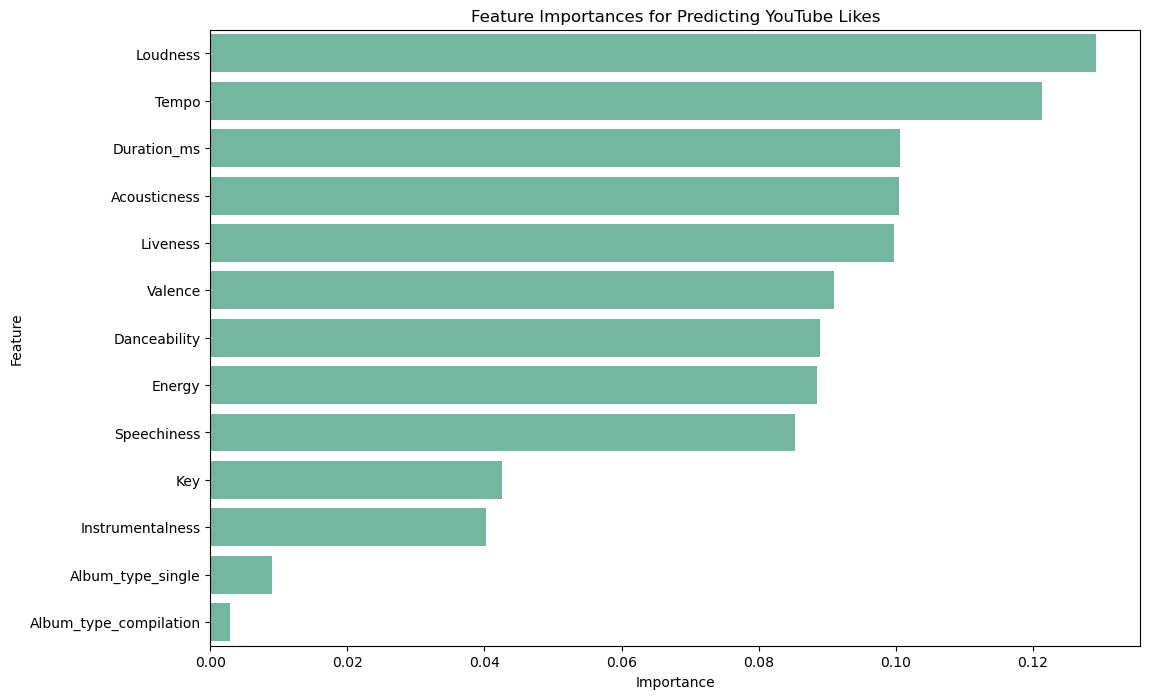

In [44]:
print("\nFeature Importances for Predicting Likes:")
print(feature_importances_likes)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_likes)
plt.title('Feature Importances for Predicting YouTube Likes')
plt.show()


In [ ]:
## Feature Importances for Predicting Comments


Feature Importances for Predicting Comments:
                   Feature  Importance
5             Acousticness    0.185004
4              Speechiness    0.125268
3                 Loudness    0.123743
1                   Energy    0.104468
9                    Tempo    0.096301
10             Duration_ms    0.082912
8                  Valence    0.071519
7                 Liveness    0.069782
0             Danceability    0.068684
2                      Key    0.035404
6         Instrumentalness    0.020851
12       Album_type_single    0.015223
11  Album_type_compilation    0.000841


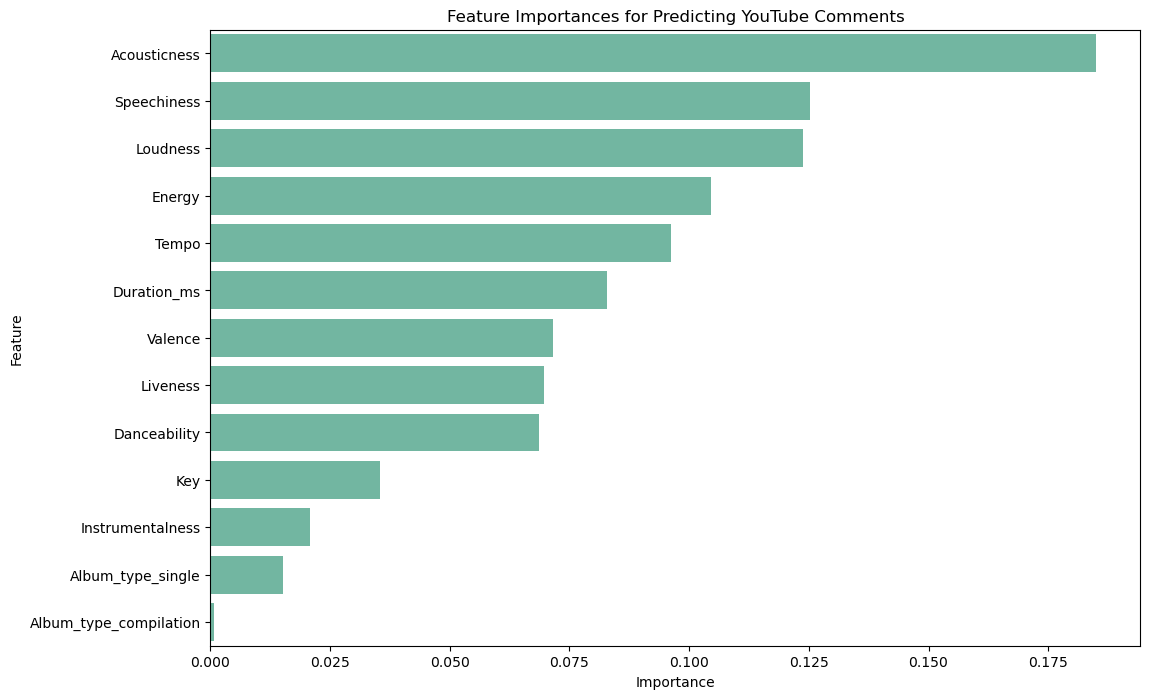

In [45]:
print("\nFeature Importances for Predicting Comments:")
print(feature_importances_comments)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_comments)
plt.title('Feature Importances for Predicting YouTube Comments')
plt.show()

## Relationships between audio features and engagement metrics. 

                  Danceability    Energy       Key  Loudness  Speechiness  \
Danceability          1.000000  0.236596  0.037735  0.353408     0.210376   
Energy                0.236596  1.000000  0.030160  0.744845     0.065319   
Key                   0.037735  0.030160  1.000000  0.025266     0.019778   
Loudness              0.353408  0.744845  0.025266  1.000000     0.033699   
Speechiness           0.210376  0.065319  0.019778  0.033699     1.000000   
Acousticness         -0.279435 -0.658304 -0.030818 -0.547680    -0.077598   
Instrumentalness     -0.318611 -0.310058  0.000747 -0.545406    -0.109895   
Liveness             -0.084482  0.173717 -0.011008  0.087062     0.085463   
Valence               0.465756  0.389158  0.042559  0.311578     0.059204   
Tempo                -0.065943  0.157383  0.001855  0.144766     0.037553   
Duration_ms          -0.089159  0.022660  0.003186  0.012063    -0.051248   
Views                 0.087533  0.066708  0.007682  0.117483    -0.012883   

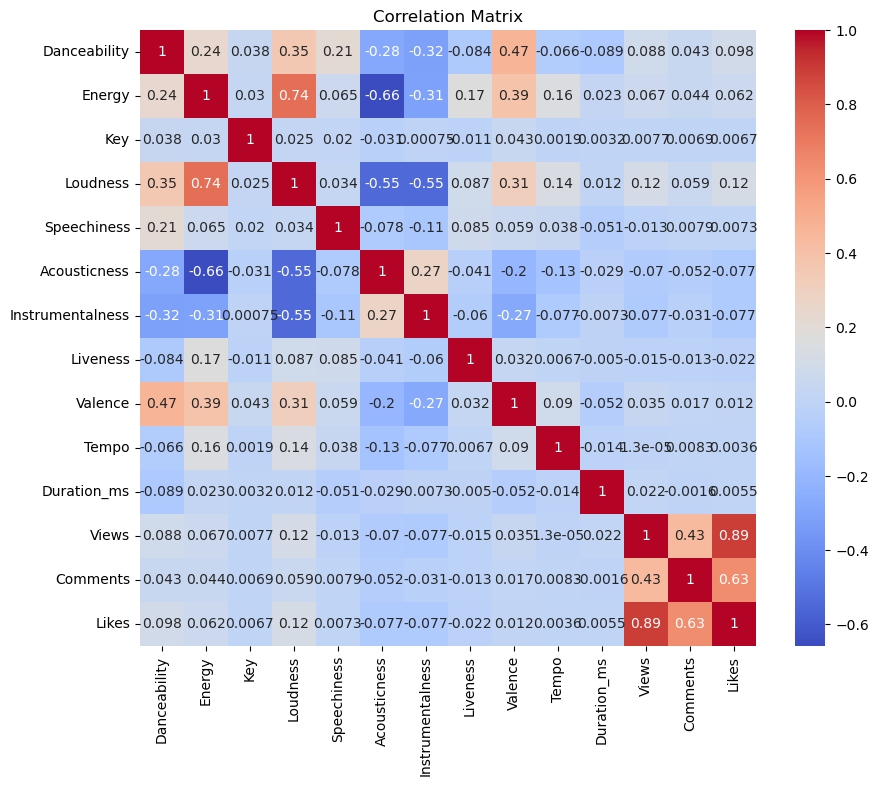

Correlation Coefficients:
Danceability vs. Views: 0.09
Danceability vs. Comments: 0.04
Danceability vs. Likes: 0.10
Energy vs. Views: 0.07
Energy vs. Comments: 0.04
Energy vs. Likes: 0.06
Key vs. Views: 0.01
Key vs. Comments: 0.01
Key vs. Likes: 0.01
Loudness vs. Views: 0.12
Loudness vs. Comments: 0.06
Loudness vs. Likes: 0.12
Speechiness vs. Views: -0.01
Speechiness vs. Comments: 0.01
Speechiness vs. Likes: 0.01
Acousticness vs. Views: -0.07
Acousticness vs. Comments: -0.05
Acousticness vs. Likes: -0.08
Instrumentalness vs. Views: -0.08
Instrumentalness vs. Comments: -0.03
Instrumentalness vs. Likes: -0.08
Liveness vs. Views: -0.02
Liveness vs. Comments: -0.01
Liveness vs. Likes: -0.02
Valence vs. Views: 0.04
Valence vs. Comments: 0.02
Valence vs. Likes: 0.01
Tempo vs. Views: 0.00
Tempo vs. Comments: 0.01
Tempo vs. Likes: 0.00
Duration_ms vs. Views: 0.02
Duration_ms vs. Comments: -0.00
Duration_ms vs. Likes: 0.01


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select the audio features and engagement metrics columns

audio_features = ['Danceability', 'Energy', 'Key','Loudness','Speechiness','Acousticness','Instrumentalness','Liveness','Valence','Tempo','Duration_ms']
engagement_metrics = ['Views', 'Comments', 'Likes'] 

# Calculate the correlation matrix
corr_matrix = data[audio_features + engagement_metrics].corr()

# Print the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Calculate the correlation coefficients between each audio feature and engagement metric
correlations = {}
for feature in audio_features:
    for metric in engagement_metrics:
        correlation = corr_matrix[feature][metric]
        correlations[(feature, metric)] = correlation

# Print the correlation coefficients
print('Correlation Coefficients:')
for (feature, metric), correlation in correlations.items():
    print(f'{feature} vs. {metric}: {correlation:.2f}')

## 2. How can we develop a robust recommendation system to accurately predict and recommend the top 5 songs, leveraging data-driven insights to optimize user engagement and satisfaction? 

In [49]:
# Recommendation System for Spotify
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Content-Based Filtering
feature_columns_spotify = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[feature_columns_spotify])

cosine_sim = cosine_similarity(scaled_features)
indices = pd.Series(data.index, index=data['Track']).drop_duplicates()

def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    song_indices = [i[0] for i in sim_scores]
    return data['Track'].iloc[song_indices]

# Example usage
print(get_recommendations('Shape of You'))


9214             El Contrato
14803    Novinha do Onlyfans
5445     Hasta El Día De Hoy
5328            Cara de Niño
1931         Mis Tres Viejas
Name: Track, dtype: object


In [50]:
# Recommendation System for YouTube
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Content-Based Filtering
feature_columns_youtube = ['Views', 'Likes', 'Comments']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[feature_columns_youtube])

cosine_sim = cosine_similarity(scaled_features)
indices = pd.Series(data.index, index=data['Track']).drop_duplicates()

def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    song_indices = [i[0] for i in sim_scores]
    return data['Track'].iloc[song_indices]

# Example usage
print(get_recommendations('Shape of You'))


13473           Rolling in the Deep
9559     The Man Who Sold The World
9967                        Perfect
92               Where Is The Love?
8227               Hail to the King
Name: Track, dtype: object


## 3. How can we utilize machine learning models to accurately predict Spotify stream counts based on YouTube engagement metrics, leveraging data-driven insights to enhance predictive accuracy and inform strategic decisions?

### Linear Regression

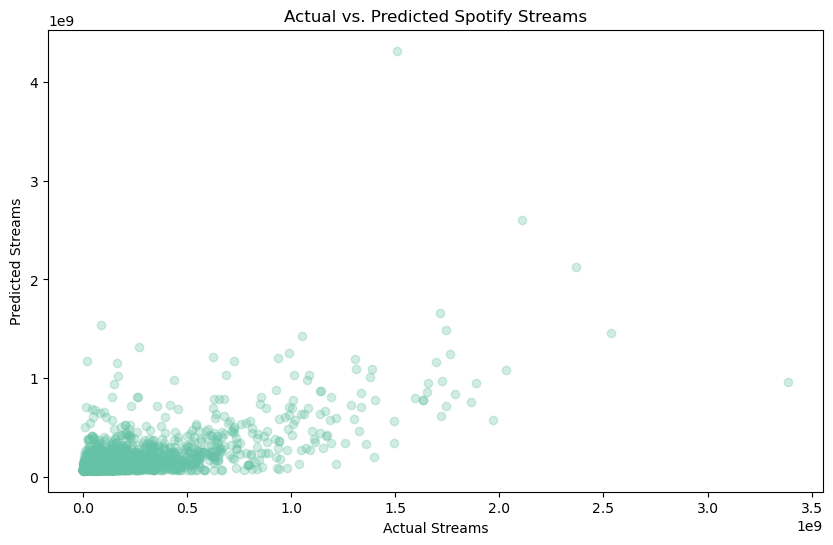

Mean Squared Error: 2.971279631864413e+16
R-squared: 0.4586432734100835

Predicted Spotify Streams: 77591132.23831254


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
features = ['Views', 'Likes', 'Comments']
target = 'Stream'

X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.title('Actual vs. Predicted Spotify Streams')
plt.show()

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print()

# Use the model for prediction
new_data = pd.DataFrame({'Views': [1000000], 'Likes': [50000], 'Comments': [2000]})
predicted_streams_lr = lr_model.predict(new_data)
print(f'Predicted Spotify Streams: {predicted_streams_lr[0]}')

### Random Forest

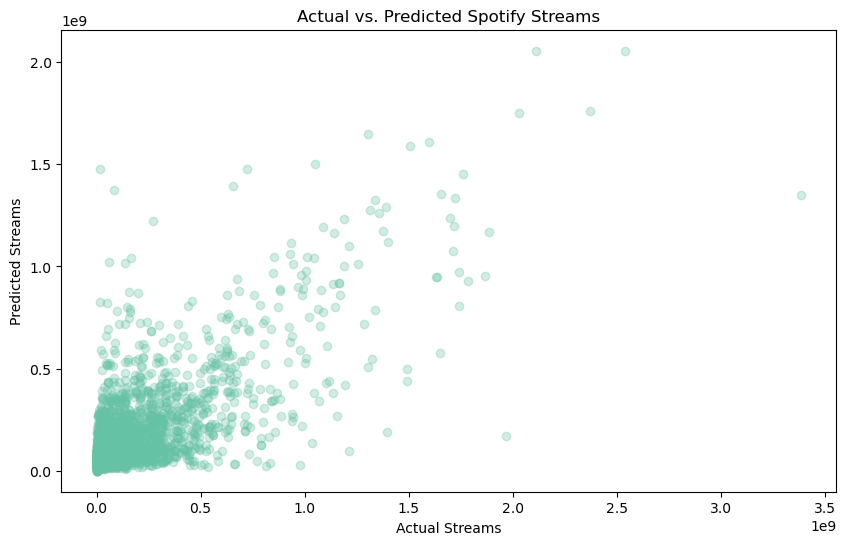

Random Forest - Mean Squared Error: 2.4674901798045356e+16
Random Forest - R-squared: 0.5504319444368259

Predicted Spotify Streams: 16665975.687659616


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select relevant features and target
features = data[['Views', 'Likes', 'Comments']]
target = data['Stream']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.3)
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.title('Actual vs. Predicted Spotify Streams')
plt.show()

print(f'Random Forest - Mean Squared Error: {rf_mse}')
print(f'Random Forest - R-squared: {rf_r2}')
print()
# Use the model for prediction
new_data = pd.DataFrame({'Views': [1000000], 'Likes': [50000], 'Comments': [2000]})
predicted_streams_rf = rf_model.predict(new_data)
print(f'Predicted Spotify Streams: {predicted_streams_rf[0]}')

### Gradient Boosting

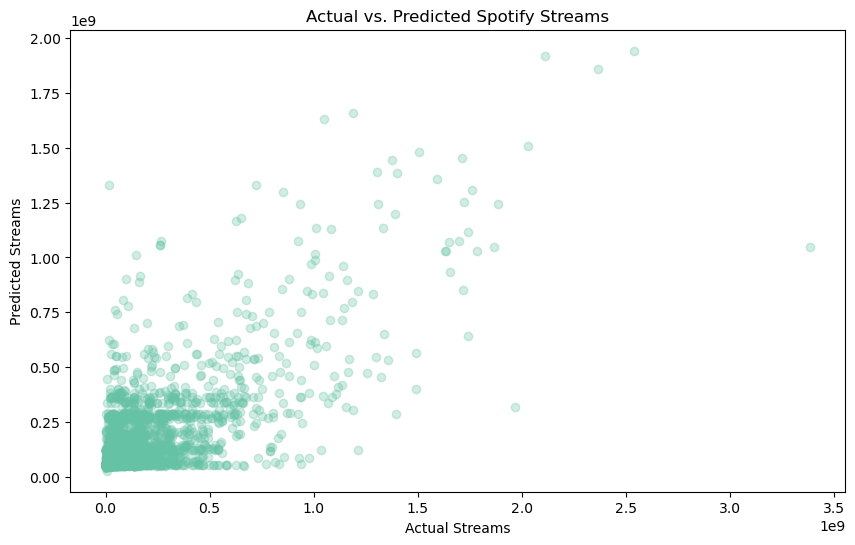

Gradient Boosting - Mean Squared Error: 2.5303438416284284e+16
Gradient Boosting - R-squared: 0.5389802277238414

Predicted Spotify Streams: 48566976.301752314


In [53]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_predictions = gb_model.predict(X_test)

# Evaluate the model
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_predictions, alpha=0.3)
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.title('Actual vs. Predicted Spotify Streams')
plt.show()

print(f'Gradient Boosting - Mean Squared Error: {gb_mse}')
print(f'Gradient Boosting - R-squared: {gb_r2}')
print()

# Use the model for prediction
new_data = pd.DataFrame({'Views': [1000000], 'Likes': [50000], 'Comments': [2000]})
predicted_streams_gb = gb_model.predict(new_data)
print(f'Predicted Spotify Streams: {predicted_streams_gb[0]}')

### 4. Can we anticipate which artists will gain future popularity by analyzing their current Spotify and YouTube metrics? 

### Random Forest

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
initial = pd.read_csv('Spotify_Youtube.csv')  # Replace with your actual file name

# Create a more robust popularity metric
initial['Popularity'] = np.log1p(
    initial['Views'].fillna(0) +
    initial['Likes'].fillna(0) * 10 +
    initial['Comments'].fillna(0) * 5 +
    initial['Stream'].fillna(0)
)

# Select relevant features
features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 
            'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Views', 'Likes', 'Comments']

# Handle missing data
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(initial[features])
y = initial['Popularity'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Random Forest): {mse}")
print(f"R-squared Score (Random Forest): {r2}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(feature_importance)


Mean Squared Error (Random Forest): 1.2324173538326746
R-squared Score (Random Forest): 0.660235968810869

Feature Importance (Random Forest):
             feature  importance
9              Views    0.548487
3        Speechiness    0.113161
10             Likes    0.057296
6           Liveness    0.043342
8              Tempo    0.034496
2           Loudness    0.033902
4       Acousticness    0.031779
0       Danceability    0.031696
7            Valence    0.031357
1             Energy    0.028603
11          Comments    0.027004
5   Instrumentalness    0.018876


In [ ]:
## Prediction of Future Popularity of Artists

In [57]:
# Predict future popularity for all artists
all_artists_scaled = scaler.transform(imputer.transform(initial[features]))
future_popularity = model.predict(all_artists_scaled)

# Add predictions to the dataframe
initial['Predicted_Future_Popularity'] = future_popularity

# Sort artists by predicted future popularity
top_future_artists = initial.sort_values('Predicted_Future_Popularity', ascending=False)[['Artist', 'Predicted_Future_Popularity']].head(10)

print("\nTop 10 Artists Predicted to Gain Popularity:")
print(top_future_artists)



Top 10 Artists Predicted to Gain Popularity:
             Artist  Predicted_Future_Popularity
1147     Luis Fonsi                    22.902939
365    Daddy Yankee                    22.902939
12452    Ed Sheeran                    22.819097
14580  Charlie Puth                    22.762465
12469   Wiz Khalifa                    22.762465
10686   Mark Ronson                    22.530500
20303     CoComelon                    22.491909
8937            PSY                    22.491625
13040   OneRepublic                    22.428567
12455    Ed Sheeran                    22.419440


In [ ]:
## Details of Top Artists

In [58]:
# If you want to see more details about these top artists:
print("\nDetailed information for top 10 artists:")
for _, artist in top_future_artists.iterrows():
    artist_data = initial[initial['Artist'] == artist['Artist']].iloc[0]
    print(f"\nArtist: {artist['Artist']}")
    print(f"Predicted Future Popularity: {artist['Predicted_Future_Popularity']:.2f}")
    print(f"Current Views: {artist_data['Views']}")
    print(f"Current Likes: {artist_data['Likes']}")
    print(f"Current Comments: {artist_data['Comments']}")
    print(f"Energy: {artist_data['Energy']:.2f}")
    print(f"Valence: {artist_data['Valence']:.2f}")


Detailed information for top 10 artists:

Artist: Luis Fonsi
Predicted Future Popularity: 22.90
Current Views: 8079649362.0
Current Likes: 50788652.0
Current Comments: 4252791.0
Energy: 0.80
Valence: 0.84

Artist: Daddy Yankee
Predicted Future Popularity: 22.90
Current Views: 9058435.0
Current Likes: 227824.0
Current Comments: 3837.0
Energy: 0.68
Valence: 0.48

Artist: Ed Sheeran
Predicted Future Popularity: 22.82
Current Views: 3361086287.0
Current Likes: 19033010.0
Current Comments: 486143.0
Energy: 0.45
Valence: 0.17

Artist: Charlie Puth
Predicted Future Popularity: 22.76
Current Views: 293356758.0
Current Likes: 8016807.0
Current Comments: 540885.0
Energy: 0.59
Valence: 0.72

Artist: Wiz Khalifa
Predicted Future Popularity: 22.76
Current Views: 5773797147.0
Current Likes: 40147618.0
Current Comments: 2127345.0
Energy: 0.48
Valence: 0.28

Artist: Mark Ronson
Predicted Future Popularity: 22.53
Current Views: 4821016218.0
Current Likes: 20067879.0
Current Comments: 598916.0
Energy: 

### Linear Regression

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Linear Regression): {mse}")
print(f"R-squared Score (Linear Regression): {r2}")

# Feature importance (for Linear Regression, we use the absolute values of coefficients)
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': np.abs(model.coef_)
}).sort_values('importance', ascending=False)

print("\nFeature Importance (Linear Regression):")
print(feature_importance)

Mean Squared Error (Linear Regression): 2.6393791907407174
R-squared Score (Linear Regression): 0.27235192616045667

Feature Importance (Linear Regression):
             feature  importance
10             Likes    0.811123
3        Speechiness    0.397249
2           Loudness    0.330786
11          Comments    0.244021
9              Views    0.183834
1             Energy    0.138087
5   Instrumentalness    0.076983
4       Acousticness    0.075710
8              Tempo    0.067748
0       Danceability    0.060246
6           Liveness    0.059969
7            Valence    0.048939


In [ ]:
## Prediction of Future Popularity of Artists

In [61]:
# Predict future popularity for all artists
all_artists_scaled = scaler.transform(imputer.transform(initial[features]))
future_popularity = model.predict(all_artists_scaled)

# Add predictions to the dataframe
initial['Predicted_Future_Popularity'] = future_popularity

# Sort artists by predicted future popularity
top_future_artists = initial.sort_values('Predicted_Future_Popularity', ascending=False)[['Artist', 'Predicted_Future_Popularity']].head(10)

print("\nTop 10 Artists Predicted to Gain Popularity:")
print(top_future_artists)



Top 10 Artists Predicted to Gain Popularity:
              Artist  Predicted_Future_Popularity
1147      Luis Fonsi                    41.196467
365     Daddy Yankee                    41.196453
14580   Charlie Puth                    37.513279
12469    Wiz Khalifa                    37.513253
12452     Ed Sheeran                    34.771362
16668    Alan Walker                    31.166893
10686    Mark Ronson                    29.628898
18568  Billie Eilish                    29.442499
140           Khalid                    29.442317
12449     Ed Sheeran                    28.627688


In [ ]:
## Details of Top Artists

In [62]:
# Detailed information for top 10 artists
print("\nDetailed information for top 10 artists:")
for _, artist in top_future_artists.iterrows():
    artist_data = initial[initial['Artist'] == artist['Artist']].iloc[0]
    print(f"\nArtist: {artist['Artist']}")
    print(f"Predicted Future Popularity: {artist['Predicted_Future_Popularity']:.2f}")
    print(f"Current Views: {artist_data['Views']}")
    print(f"Current Likes: {artist_data['Likes']}")
    print(f"Current Comments: {artist_data['Comments']}")
    print(f"Energy: {artist_data['Energy']:.2f}")
    print(f"Valence: {artist_data['Valence']:.2f}")


Detailed information for top 10 artists:

Artist: Luis Fonsi
Predicted Future Popularity: 41.20
Current Views: 8079649362.0
Current Likes: 50788652.0
Current Comments: 4252791.0
Energy: 0.80
Valence: 0.84

Artist: Daddy Yankee
Predicted Future Popularity: 41.20
Current Views: 9058435.0
Current Likes: 227824.0
Current Comments: 3837.0
Energy: 0.68
Valence: 0.48

Artist: Charlie Puth
Predicted Future Popularity: 37.51
Current Views: 293356758.0
Current Likes: 8016807.0
Current Comments: 540885.0
Energy: 0.59
Valence: 0.72

Artist: Wiz Khalifa
Predicted Future Popularity: 37.51
Current Views: 5773797147.0
Current Likes: 40147618.0
Current Comments: 2127345.0
Energy: 0.48
Valence: 0.28

Artist: Ed Sheeran
Predicted Future Popularity: 34.77
Current Views: 3361086287.0
Current Likes: 19033010.0
Current Comments: 486143.0
Energy: 0.45
Valence: 0.17

Artist: Alan Walker
Predicted Future Popularity: 31.17
Current Views: 3400741854.0
Current Likes: 26446178.0
Current Comments: 1250054.0
Energy:

### Gradient Boostin

In [63]:
#Gradient Boosting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Train a Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
#accuracy = accuracy_score(y_test, y_pred)
#print(f'Accuracy: {accuracy}')

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Mean Squared Error: 1.2945393846018602
R-squared Score: 0.6431096020535736

Feature Importance:
             feature  importance
9              Views    0.581163
10             Likes    0.252510
3        Speechiness    0.114920
4       Acousticness    0.009928
6           Liveness    0.009519
1             Energy    0.007370
8              Tempo    0.006517
7            Valence    0.004240
11          Comments    0.004061
0       Danceability    0.003656
2           Loudness    0.003560
5   Instrumentalness    0.002555


In [ ]:
## Prediction of Future Popularity of Artists

In [64]:
# Predict future popularity for all artists
all_artists_scaled = scaler.transform(imputer.transform(initial[features]))
future_popularity = model.predict(all_artists_scaled)

# Add predictions to the dataframe
initial['Predicted_Future_Popularity'] = future_popularity

# Sort artists by predicted future popularity
top_future_artists = initial.sort_values('Predicted_Future_Popularity', ascending=False)[['Artist', 'Predicted_Future_Popularity']].head(10)

print("\nTop 10 Artists Predicted to Gain Popularity:")
print(top_future_artists)


Top 10 Artists Predicted to Gain Popularity:
             Artist  Predicted_Future_Popularity
20303     CoComelon                    22.310932
1147     Luis Fonsi                    22.264605
365    Daddy Yankee                    22.264605
12469   Wiz Khalifa                    22.161406
14580  Charlie Puth                    22.161406
12652     Passenger                    22.152268
9569       Maroon 5                    22.114922
12452    Ed Sheeran                    22.112382
13032    Katy Perry                    22.109441
10686   Mark Ronson                    22.103999


In [ ]:
## Details of Top Artists

In [65]:
# Detailed information for top 10 artists
print("\nDetailed information for top 10 artists:")
for _, artist in top_future_artists.iterrows():
    artist_data = initial[initial['Artist'] == artist['Artist']].iloc[0]
    print(f"\nArtist: {artist['Artist']}")
    print(f"Predicted Future Popularity: {artist['Predicted_Future_Popularity']:.2f}")
    print(f"Current Views: {artist_data['Views']}")
    print(f"Current Likes: {artist_data['Likes']}")
    print(f"Current Comments: {artist_data['Comments']}")
    print(f"Energy: {artist_data['Energy']:.2f}")
    print(f"Valence: {artist_data['Valence']:.2f}")



Detailed information for top 10 artists:

Artist: CoComelon
Predicted Future Popularity: 22.31
Current Views: 4898831101.0
Current Likes: 14396841.0
Current Comments: 0.0
Energy: 0.39
Valence: 0.96

Artist: Luis Fonsi
Predicted Future Popularity: 22.26
Current Views: 8079649362.0
Current Likes: 50788652.0
Current Comments: 4252791.0
Energy: 0.80
Valence: 0.84

Artist: Daddy Yankee
Predicted Future Popularity: 22.26
Current Views: 9058435.0
Current Likes: 227824.0
Current Comments: 3837.0
Energy: 0.68
Valence: 0.48

Artist: Wiz Khalifa
Predicted Future Popularity: 22.16
Current Views: 5773797147.0
Current Likes: 40147618.0
Current Comments: 2127345.0
Energy: 0.48
Valence: 0.28

Artist: Charlie Puth
Predicted Future Popularity: 22.16
Current Views: 293356758.0
Current Likes: 8016807.0
Current Comments: 540885.0
Energy: 0.59
Valence: 0.72

Artist: Passenger
Predicted Future Popularity: 22.15
Current Views: 3376086171.0
Current Likes: 15361684.0
Current Comments: 452077.0
Energy: 0.55
Val